In [1]:
import pandas as pd
import numpy  as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
from sklearn import linear_model

In [3]:
df = pd.read_csv("E:/myproject/Literature/bahari_data645.csv")

In [4]:
df.head(2)

,add_period,infection_years,symptoms_days,age,gender,top,bottom,pressure,bmi,sugar,...,fatig,vomit,wt_loss,pain,fever,RR,HR,PSO,TEM,class
0,16,10.0,14.0,65,1,110,80,0,27,350,...,0,0,0,1,1,22,88,98,37.0,1
1,13,8.0,60.0,40,1,120,80,0,29,397,...,0,0,0,1,1,22,83,96,35.4,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.columns

Index(['add_period', 'infection_years', 'symptoms_days', 'age', 'gender',
       'top', 'bottom', 'pressure', 'bmi', 'sugar', 'swelling', 'ucdm', 'dka',
       'dsf', 'dsh', 'poly', 'headache', 'Malaria', 'cough', 'no_appet',
       'fatig', 'vomit', 'wt_loss', 'pain', 'fever', 'RR', 'HR', 'PSO', 'TEM',
       'class'],
      dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[[
    'infection_years', 'sugar', 'swelling', 'dka', 'dsf', 'HR']],df['class'] , test_size=0.30,
                                                    random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression


In [9]:
model = LogisticRegression()


In [10]:
model.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model.predict([[5,50,1,0,0,90]])[0]

0

In [14]:
y_pred = model.predict(X_test)  #[0:10]
#y_pred

In [15]:
model.score(X_test,y_test)

0.8298969072164949

In [18]:
import pickle

## Using JSON

In [30]:
import json
model_param ={}
model_param['coef'] = list(model.coef_)
model_param['intercept'] = model.intercept_.tolist()

In [32]:
#json_txt = json.dumps(model_param,indent=4)
#with open('model_v4.txt','w') as file:
  #  json.dump(model_param,file)

### the first method

In [24]:
file_name = "model_v3.pkl"
with open(file_name,'wb') as file:
    pickle.dump(model,file)

In [20]:
lr_from_pickle = pickle.loads(saved_model)

In [22]:
lr_from_pickle.predict([[5,500,1,0,0,90]])[0]

1

In [16]:
import pickle
from sklearn.externals import joblib
filename = 'model_22.pkl'
joblib.dump(model, filename)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_22.pkl']

In [48]:
# class distribution
y_test.value_counts()  #normalize=True)

0    126
1     68
Name: class, dtype: int64

In [49]:
y_test.mean()

0.35051546391752575

In [50]:
1 - y_test.mean()

0.6494845360824743

In [51]:
print ('true', y_test.values[0:25])
print ('pred', y_pred[0:25])

true [1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0]
pred [1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0]


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
print (metrics.confusion_matrix(y_test,y_pred))

[[102  24]
 [ 13  55]]


In [54]:
# General accuracy score
print (metrics.accuracy_score(y_test,y_pred))

0.8092783505154639


In [55]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [56]:
print (TP / float(TP + FN))  # sensitivity 
print (metrics.recall_score(y_test,y_pred))

0.8088235294117647
0.8088235294117647


In [57]:
# Specificity 
print (TN / float(TN + FP))

0.8095238095238095


In [58]:
# calculate precision Rate
print (metrics.precision_score(y_test,y_pred))

0.6962025316455697


In [59]:
# F1 score 
print (metrics.f1_score(y_test,y_pred))

0.7482993197278912


In [60]:
# Error type 1
print (FP / float(TN + FP))

0.19047619047619047


# Adjusting the classification threshold

In [25]:
# print the first 10 predicted response
model.predict(X_test)[0:10]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
# print the first 10 predicted probabilities of class membership
model.predict_proba(X_test)[0:10, :]

array([[0.41026006, 0.58973994],
       [0.42457165, 0.57542835],
       [0.91899856, 0.08100144],
       [0.96822082, 0.03177918],
       [0.47149128, 0.52850872],
       [0.79745849, 0.20254151],
       [0.1615026 , 0.8384974 ],
       [0.58969614, 0.41030386],
       [0.96321396, 0.03678604],
       [0.94623435, 0.05376565]])

In [27]:
# print the first 10 predicted probabilities for class 1
model.predict_proba(X_test)[0:10, 1 ]

array([0.58973994, 0.57542835, 0.08100144, 0.03177918, 0.52850872,
       0.20254151, 0.8384974 , 0.41030386, 0.03678604, 0.05376565])

In [28]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:,1]

In [29]:
plt.rcParams['font.size'] = 14

Text(0.5, 1.0, 'Frequency')

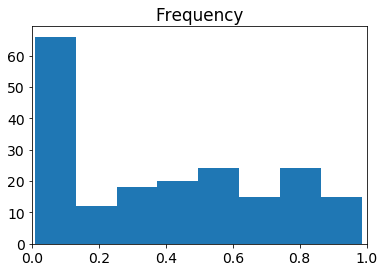

In [30]:
# histogram of predicted probabilities
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Hitogram of predicted probabilities')
plt.title('predicted probability of diabetes')
plt.title('Frequency')

# Decrease the threshold for predicting diabetes 
# to increase the sensitivity


In [31]:
# predict diabetes if the predicted probability is greater then 0.30
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1,-1), 0.4)[0]

In [32]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.58973994, 0.57542835, 0.08100144, 0.03177918, 0.52850872,
       0.20254151, 0.8384974 , 0.41030386, 0.03678604, 0.05376565])

In [33]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 1., 0., 0., 1., 0., 1., 1., 0., 0.])

In [34]:
# previous confusion matrix (threshold of 0.5)
#print (confusion)

In [35]:
# new confusion matrix (threshold of 0.3)
print (metrics.confusion_matrix(y_test,y_pred_class))

[[94 32]
 [ 9 59]]


In [36]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TP2 = confusion[1,1]
TN2 = confusion[0,0]
FP2 = confusion[0,1]
FN2 = confusion[1,0]

In [37]:
# General accuracy score
print (metrics.accuracy_score(y_test,y_pred_class))

0.788659793814433


In [38]:
# sensitivity has increased (used to be 0.74)
#print (TP2 / float(TP2 + FN2))
#print (62 / float(62 + 6))
print (metrics.recall_score(y_test,y_pred_class))

0.8676470588235294


In [39]:
# specificity has decreased 
print (TN2 / float(TN2 + FP2))

0.746031746031746


In [40]:
# calculate precision Rate
#print (TP2/ float(TP2+FP2))
print (metrics.precision_score(y_test,y_pred_class))

0.6483516483516484


In [41]:
from sklearn.metrics import f1_score

In [42]:
# F1 score 
print (metrics.f1_score(y_test,y_pred_class))
#print ((2*TP2) / float(2*TP2 + FP2 + FN2))

0.7421383647798743


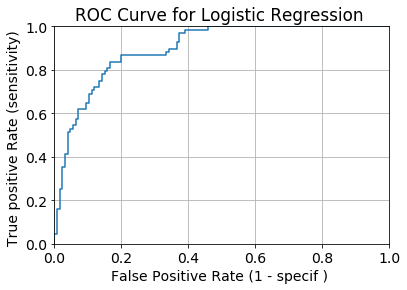

In [43]:
# important: first argument is true values, second is predicted probabilities
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Logistic Regression ')
plt.xlabel('False Positive Rate (1 - specif ) ')
plt.ylabel('True positive Rate (sensitivity) ')
plt.grid(True)

In [104]:
# important: first argument is true values, second is predicted probabilities
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.8951914098972923


In [40]:
y = df['class']

In [41]:
X = df.drop('class',axis='columns')

In [42]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(n_estimators=20)

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
model.score(X_test, y_test)

0.8350515463917526

In [47]:
from sklearn import metrics

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred))

0.7371134020618557


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred))

0.7010309278350515


# Can we evaluate better value for K

In [50]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    

Text(0, 0.5, 'Testing accuracy')

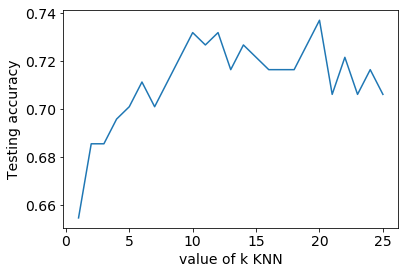

In [51]:
plt.plot(k_range,scores)
plt.xlabel('value of k KNN')
plt.ylabel('Testing accuracy')

In [53]:
from sklearn.import cross_val_score

SyntaxError: invalid syntax (<ipython-input-53-19aa77ec8940>, line 1)

In [82]:
knn = KNeighborsClassifier(n_neighbors=15)
scores = cross_val_score(knn, X,y,cv=10, scoring='accuracy')
print (scores)

NameError: name 'cross_val_score' is not defined

In [54]:
print scores.mean()

SyntaxError: invalid syntax (<ipython-input-54-bd848f01ac0c>, line 1)